In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
print("Columns available:\n", df.columns.tolist())

Columns available:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

In [11]:
# 1. Countries of interest
countries = ["United States", "India", "Brazil"]

# 2. Exact columns we need
cols = [
    "location",
    "date",
    "total_vaccinations_per_hundred",
    "new_vaccinations_smoothed_per_million",
]

# 3. Filter rows and drop any with missing values
df = df[df.location.isin(countries)][cols].dropna()
df.tail()

,location,date,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million
404667,United States,2023-05-05,203.79,239.0
404668,United States,2023-05-06,203.80,239.0
404669,United States,2023-05-07,203.81,238.0
404670,United States,2023-05-08,203.82,223.0
404671,United States,2023-05-09,203.83,188.0


In [12]:
peaks = (
    df
    .groupby("location")["new_vaccinations_smoothed_per_million"]
    .max()
)
print("Peak daily vaccinations (smoothed) per million:\n", peaks)

Peak daily vaccinations (smoothed) per million:
 location
Brazil            9016.0
India             7083.0
United States    10566.0
Name: new_vaccinations_smoothed_per_million, dtype: float64


In [13]:
times_to_half = {}
for loc in countries:
    sub = df[df.location == loc]
    # first date where total_vaccinations_per_hundred ≥ 50
    date50 = sub[sub.total_vaccinations_per_hundred >= 50].date.min()
    times_to_half[loc] = date50

print("Dates reaching ≥50%:", times_to_half)

Dates reaching ≥50%: {'United States': Timestamp('2021-03-30 00:00:00'), 'India': Timestamp('2021-09-08 00:00:00'), 'Brazil': Timestamp('2021-07-06 00:00:00')}


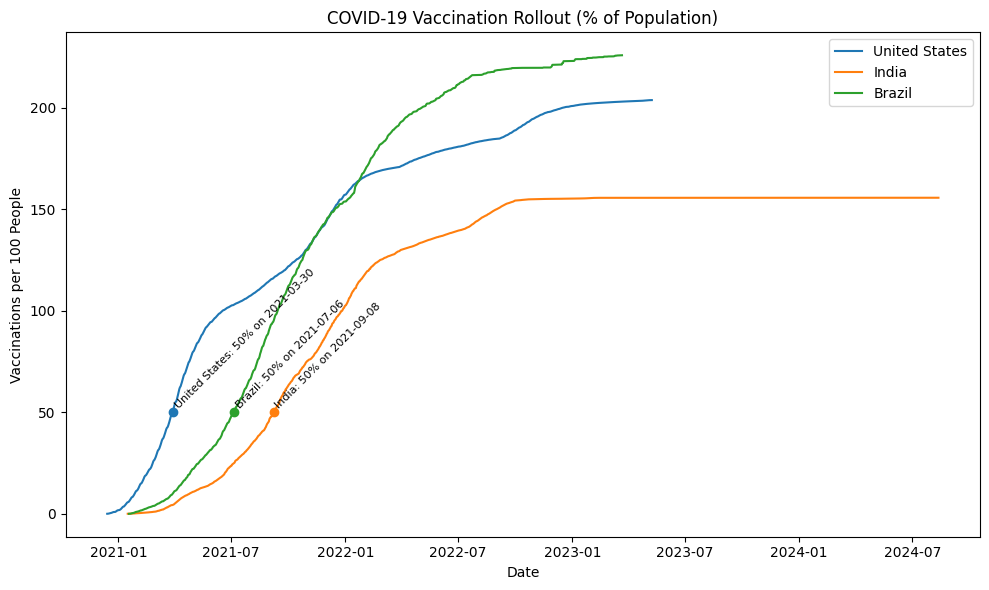

In [15]:
plt.figure(figsize=(10, 6))
for loc in countries:
    sub = df[df.location == loc]
    plt.plot(sub.date, sub.total_vaccinations_per_hundred, label=loc)
    d50 = times_to_half[loc]
    if pd.notna(d50):
        plt.scatter(d50, 50)
        plt.text(
            d50, 52,
            f"{loc}: 50% on {d50.date()}",
            fontsize=8, rotation=45
        )
plt.title("COVID-19 Vaccination Rollout (% of Population)")
plt.xlabel("Date")
plt.ylabel("Vaccinations per 100 People")
plt.legend()
plt.tight_layout()
plt.savefig("vax_rollout.png")
plt.show()


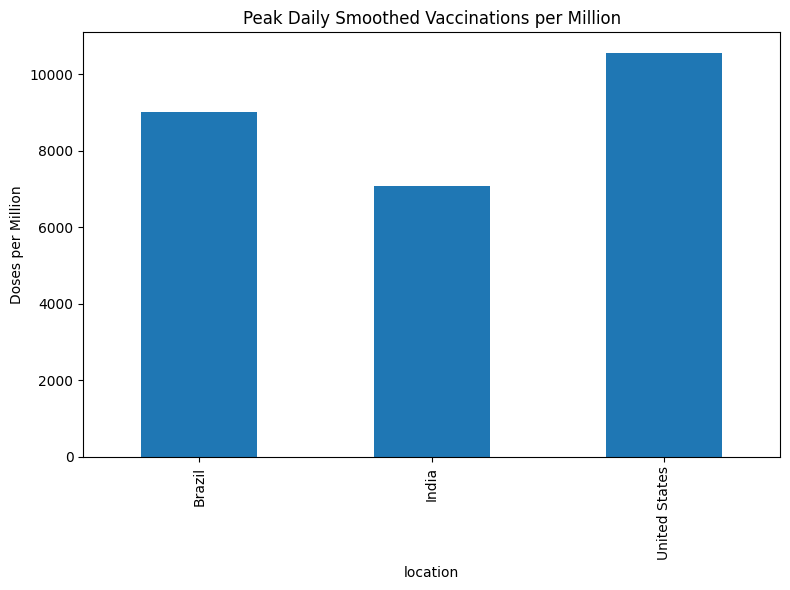

In [19]:
# Peak Daily Vaccinations Bar Chart
peaks.plot(kind="bar", figsize=(8,6))
plt.title("Peak Daily Smoothed Vaccinations per Million")
plt.ylabel("Doses per Million")
plt.tight_layout()
plt.savefig("peak_daily_vaccinations.png")
plt.show()